In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

from kernel import *
from MMD import *

# Question 2 : Data generation

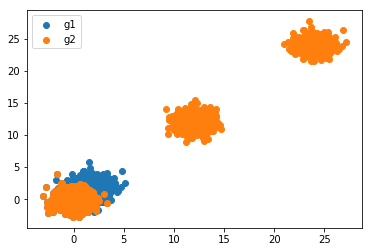

In [9]:
def gaussian_mix(d,N,t,n,s=1, seed=1):
    np.random.seed(seed)
    cov = np.identity(d)
    mean = np.zeros(d)
    n_tot = N*n
    res = np.zeros((d,n_tot))
    for i in range(N):
        gaus = np.random.multivariate_normal(mean + t*i, cov*(s**i),n).T
        for j in range(d):
            res[j][i*n:(i+1)*n] = gaus[j]
            
    return(res)  

g1 = gaussian_mix(d=2,N=3,t=1,n=500, seed=1) 
g2 = gaussian_mix(d=2,N=3,t=12,n=500, seed=1) 

plt.scatter(g1[0], g1[1], label="g1")
plt.scatter(g2[0], g2[1], label="g2")
plt.legend()
plt.show()

# Question 3 : MMD and type I error

The MMD test is now implemented.

#### TODO : Propose a strategy to check whether MMD is a test of level α. Then, present experiments on the gaussian data. Discuss the results.

In [4]:
%%time
kernel_class = GaussianKernel()
test = MMD_test(kernel_class=kernel_class, alpha=0.05, biased=True)

test.fit(X=g1, Y=g2, verbose=True)
test.get_results()

MMD test of level alpha=0.05, biased=True estimator
Kernel: Gaussian Kernel with sigma=1
Result: H0 rejected, test statistic=0.448491693291057 > threshold=0.1258939141153885
CPU times: user 177 ms, sys: 48.1 ms, total: 225 ms
Wall time: 199 ms


#### Verification with old implementation

In [7]:
from itertools import product   

def gauss_kernel(x,y,s=1):
    k = np.exp(-sum((x-y)**2)/(2*(s**2)))
    return k

def threshold(n,alpha=0.05):  # gauss kernel <=1, K = 1
    t = np.sqrt(2/n)*(1+np.sqrt(2*np.log(1/alpha)))  #need n=m
    return(t)

def MMD2(g1,g2): # moins long ?
    n = len(g1[0])
    m = len(g2[0])
    
    mmd1 = [gauss_kernel(g1.T[i],g1.T[j])/n**2 for i,j in product(range(n),range(n))]
    mmd2 = [gauss_kernel(g2.T[i],g2.T[j])/m**2 for i,j in product(range(m),range(m))]
    mmd3 = [-2*gauss_kernel(g1.T[i],g2.T[j])/(m*n) for i,j in product(range(n),range(m))]
    
    MMD = np.sqrt(sum(mmd1) + sum(mmd2) + sum(mmd3))
    
    return(MMD) 

    
def TST_MMD(g1,g2,alpha=0.05):
    if len(g1) != len(g2):
        print('data must have the same dimension')
        mmd = 0
        t=0

    if len(g1[0]) != len(g1[0]):
        print('data must have the same number of points')
        mmd = 0
        t = 0

    if len(g1) == len(g2) and len(g1[0]) == len(g1[0]) :
        mmd = MMD2(g1,g2)
        t = threshold(len(g1[0]), alpha)
        if mmd <= t:
            print('H0 accepted at level',alpha)
        else:
            print('H0 rejected at level',alpha)
    
    return mmd, t

In [8]:
%%time
TST_MMD(g1,g2)

H0 rejected at level 0.05
CPU times: user 58.7 s, sys: 826 ms, total: 59.6 s
Wall time: 1min 2s


(0.44849169329103433, 0.1258939141153885)